<a href="https://www.kaggle.com/code/farhanapraxy/survival-prediction?scriptVersionId=232121768" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# **Importing Datasets**

In [2]:
#Load and display the train data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")  
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Load and display the test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# **EDA on Datasets** 

**1**.**Data Exploration**:
After importing and loading the training and testing data sets. The following in Data Exploration is understanding the features information such as: 
1. Number of columns and rows
2. Summary statistics of numerical values
3. Checking are Removing Duplicates
4. Checking the missing and Null values in the datasets and removing them by dropping some features and imputinguting

In [4]:
# Understanding variable data types and shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Descriptive statistical summary
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Checking Duplicates
train_data.duplicated().sum()

0

In [7]:
# Missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#Imputing Missing values in Age feature using median
median_age = train_data['Age'].median()

# Fill missing values in 'Age' column by using a dictionary
train_data.fillna({'Age': median_age}, inplace=True)

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Checking unique values in Embarked
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
#Retrieving the most frequent unique value
mode_embarked = train_data['Embarked'].mode()[0]
mode_embarked

'S'

In [11]:
#Imputing nan with the most frequent unique value in Embarked
train_data.fillna({'Embarked': mode_embarked}, inplace=True)

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
# Drop the Cabin column since number of missing values is more 77%
train_data = train_data.drop('Cabin', axis=1)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

**Data Exploration on Testing Dataset**

In [13]:
# Understanding variable data types and shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
# Descriptive statistical summary
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
# Checking Duplicates
test_data.duplicated().sum()

0

In [16]:
# Missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
#Imputing Missing values in Age feature using median
median_age = test_data['Age'].median()

# Fill missing values in 'Age' column by using a dictionary
test_data.fillna({'Age': median_age}, inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
#Imputing Missing values in Fare feature using median
median_age = test_data['Fare'].median()

# Fill missing values in 'Age' column by using a dictionary
test_data.fillna({'Fare': median_age}, inplace=True)

test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [19]:
# Drop the Cabin column since number of missing values is more 77%
test_data = test_data.drop('Cabin', axis=1)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

2. **Visualization**
   This checks the:
   1. Distribution with continous features such as Age, Fare
   2. Count following grouping in the dataset like SibSp, ParCh
   3. Checking for outliers in Age and Fare
   4. Establishing Relationships between bivariate features

**Numerical Variables Distribution**

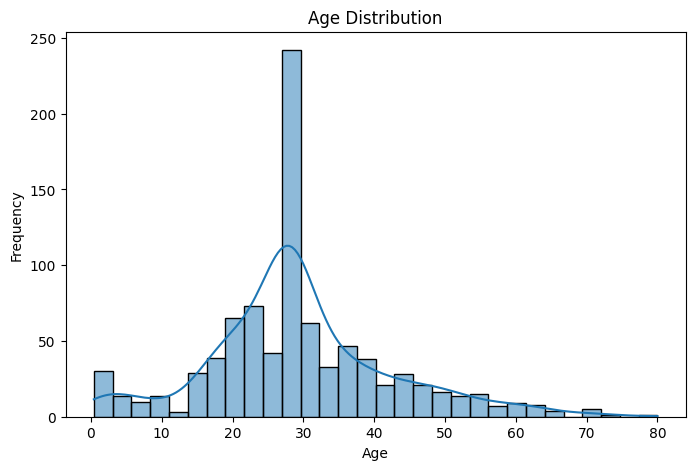

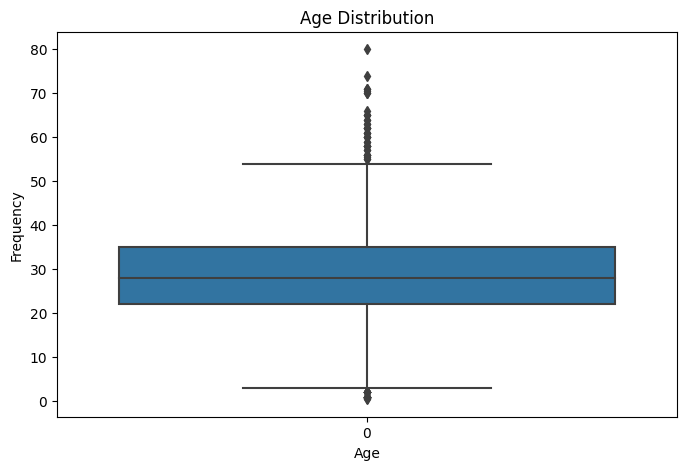

In [20]:
#Distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(train_data["Age"], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(train_data["Age"])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

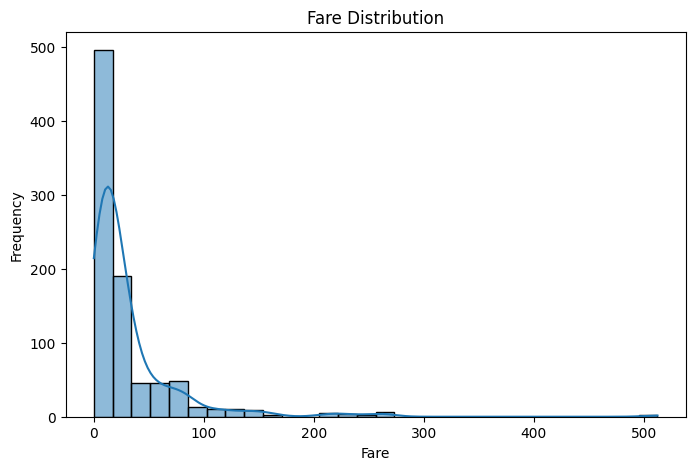

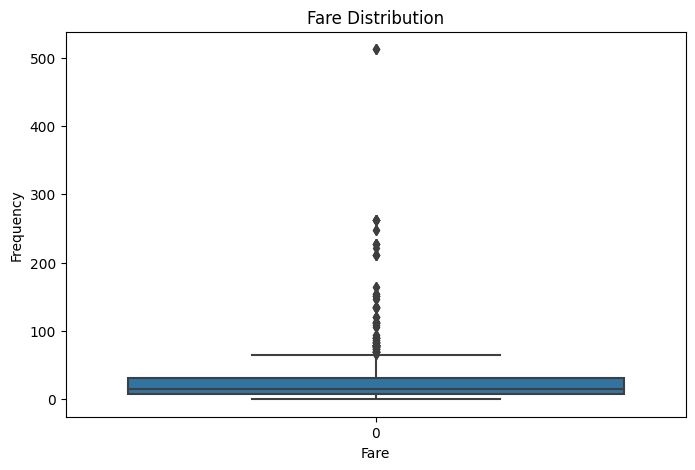

In [21]:
#Distribution of fare
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(train_data['Fare'])
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

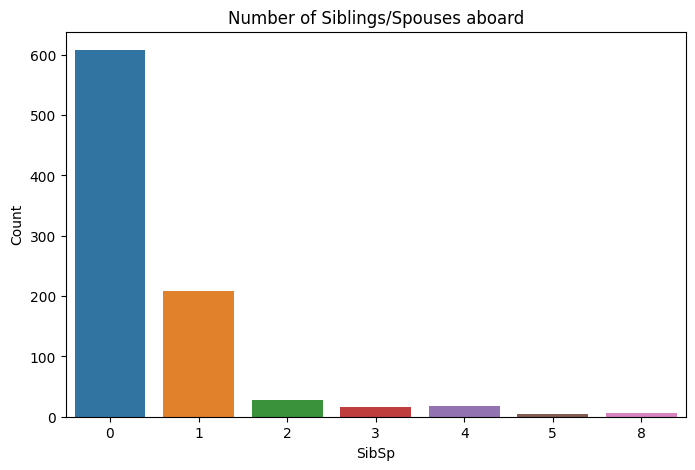

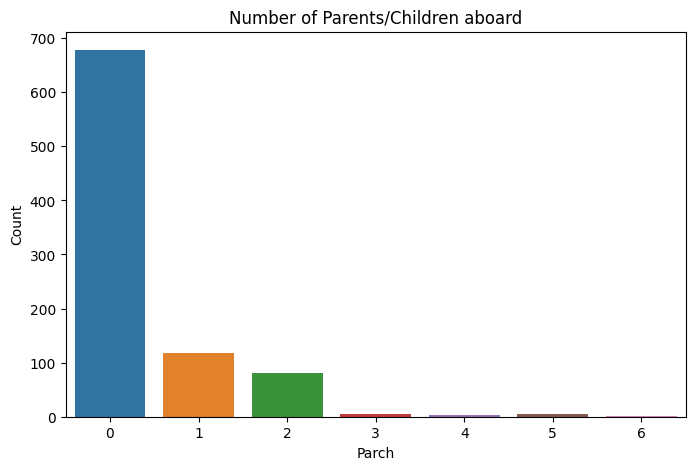

In [22]:
#Distribution on Sibsp and Parch
plt.figure(figsize=(8, 5))
sns.countplot(x='SibSp', data=train_data)
plt.title('Number of Siblings/Spouses aboard')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Parch', data=train_data)
plt.title('Number of Parents/Children aboard')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

**Categorical Variables Distribution**

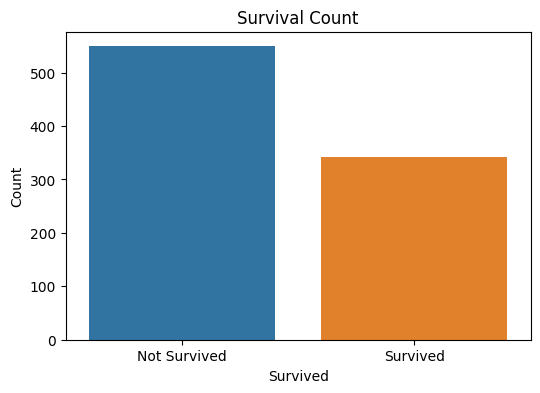

In [23]:
#Distribution on Survival using a barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

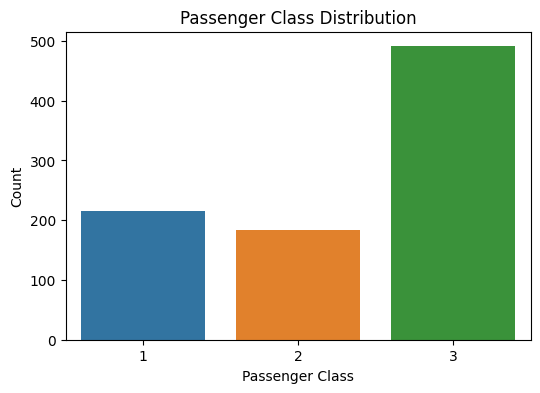

In [24]:
#Distribution on Passenger class using a barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

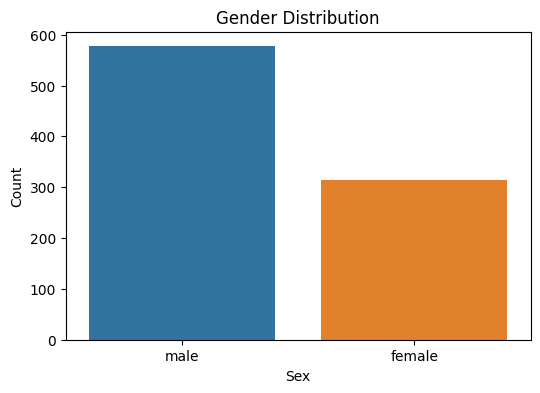

In [25]:
#Distribution on Gender using a barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train_data)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


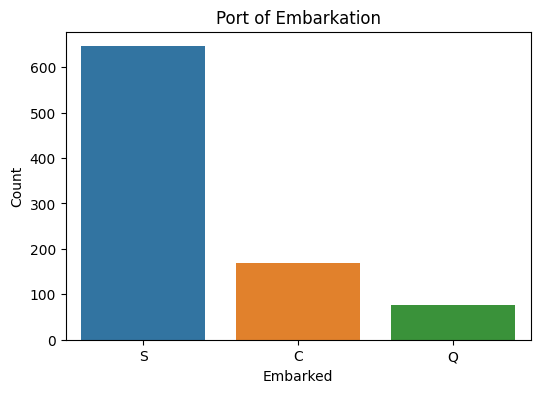

In [26]:
#Distribution on Embarkation Port using a barplot
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', data=train_data)
plt.title('Port of Embarkation')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

**Bivariate Variables**
**Numerical variable relationship**

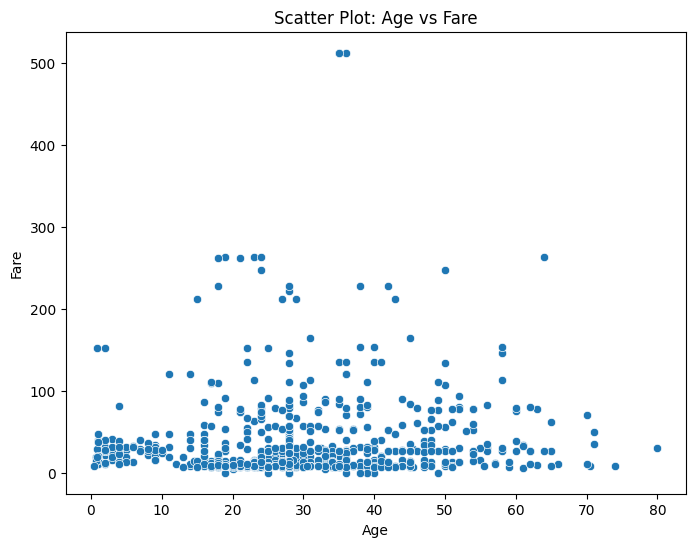

In [27]:
#Relationship between age and fare
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=train_data)
plt.title('Scatter Plot: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

**Categorical Varibles Relationships with Survival**

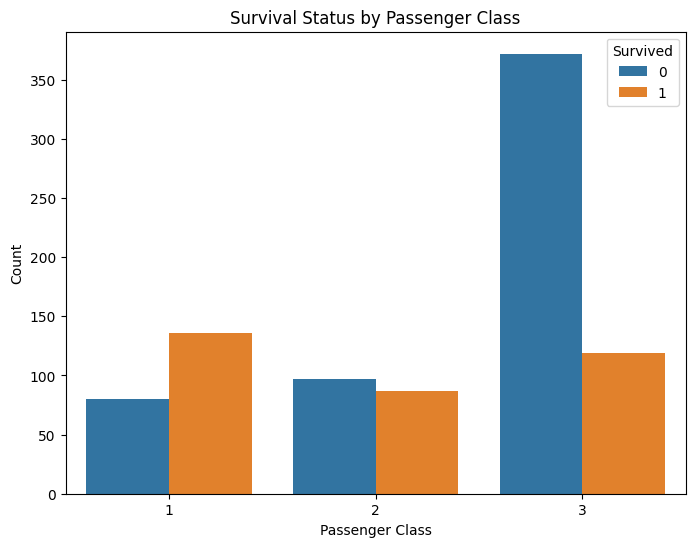

In [28]:
#Survival Status vs. Passenger Class (Pclass) using barplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Status by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

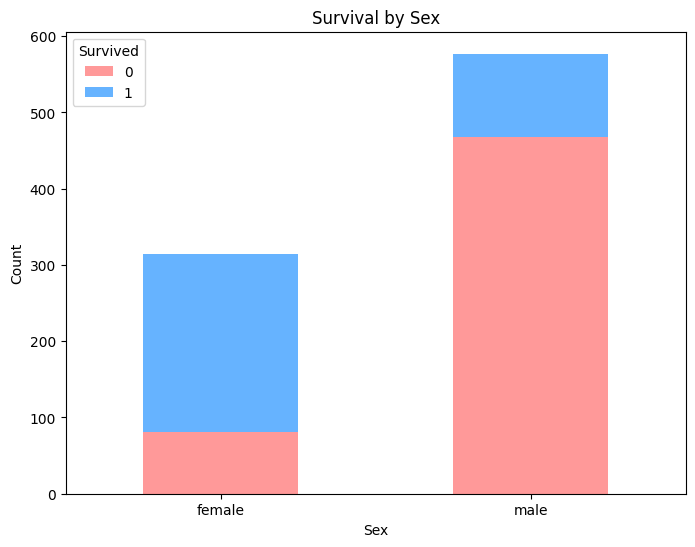

In [29]:
#Survival Status vs. Sex (Gender)
# Creating a cross-tabulation of 'Survived' by 'Sex'
survival_by_sex = pd.crosstab(train_data['Sex'], train_data['Survived'])

# Plotting stacked bar plot
survival_by_sex.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#ff9999', '#66b3ff'])
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

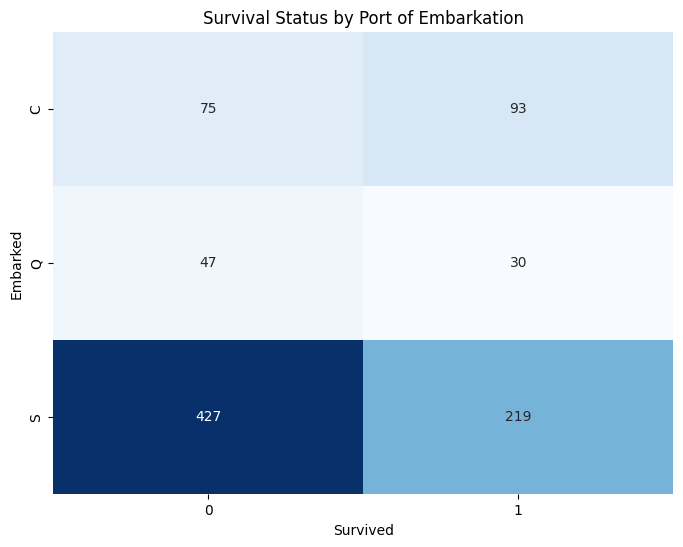

In [30]:
#Survival Status vs. Embarked (Port of Embarkation)
# Creating a cross-tabulation of 'Survived' by 'Embarked'
embarked_survival = pd.crosstab(train_data['Embarked'], train_data['Survived'])

# Plotting a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(embarked_survival, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Survival Status by Port of Embarkation')
plt.xlabel('Survived')
plt.ylabel('Embarked')
plt.show()


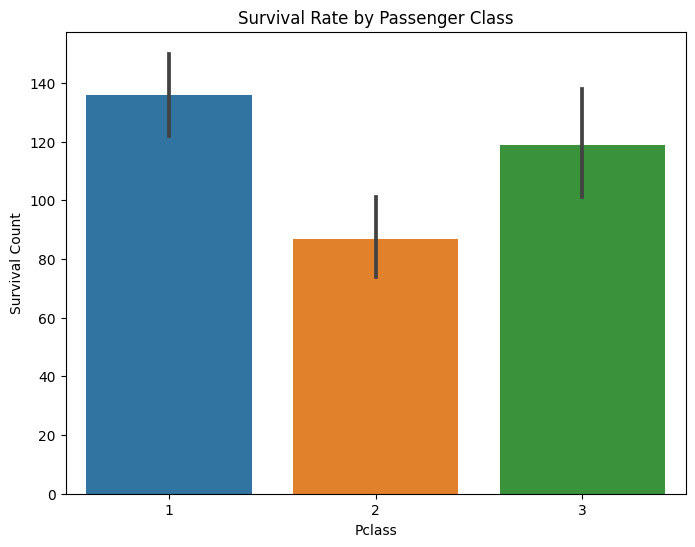

In [31]:
#Survival Status vs. Pclass (Passenger Class)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data, estimator=sum)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Count')
plt.show()


**Multivariate Variable relationship**

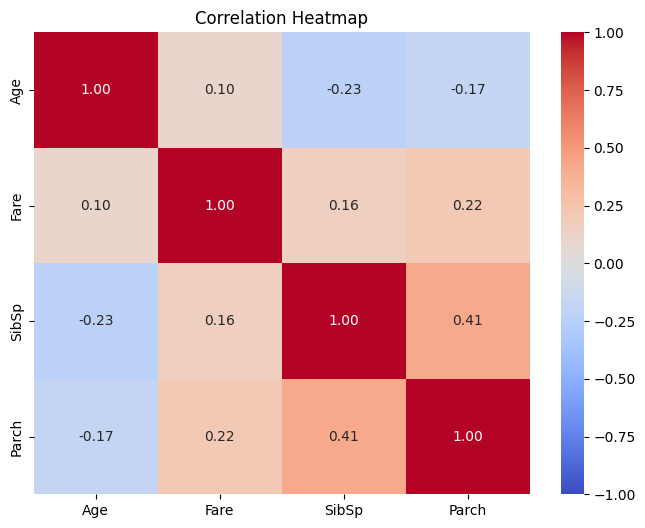

In [32]:
# Correlation heatmap
corr = train_data[['Age', 'Fare', 'SibSp', 'Parch']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

2. **Feature Engineering**
   1. Create new features like familySize and Title for the Existing features
   2. Dropping less useful features such as Name and Ticket

1. **Feature Engineering on Training Dataset**

In [33]:
#Creating new features
#Family size variable
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [34]:
#Extract Title from Name
#train_data['Title'] = train_data['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [35]:
# Dropping less useful columns 
train_data = train_data.drop(['Name', 'Ticket'], axis=1)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,1,0,7.2500,S,2
1,2,1,1,female,38.0,1,0,71.2833,C,2
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,2
4,5,0,3,male,35.0,0,0,8.0500,S,1


2. **Feature Engineering on Testing Dataset**

In [36]:
#Creating new features
#Family size variable
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [37]:
#Extract Title from Name
#test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


In [38]:
# Dropping less useful columns 
test_data = test_data.drop(['Name', 'Ticket'], axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,2
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


3. **Encoding Categorical Variables on Training Dataset**

In [39]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [40]:
encod_data = {
     'Sex': ['male', 'female', 'female', 'male', 'female'],
     'Embarked': ['S', 'C', 'S', 'S', 'Q']
}


df = pd.DataFrame(encod_data)

# Encoding 'Sex' with label encoding (0 and 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding 'Pclass' and 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])

# Convert boolean columns to integer type
df = df.astype(int)

# Display the resulting DataFrame
print("Data after encoding:")
print(df.head())

#Transformed Training Data

# Encode 'Sex' with label encoding (0 and 1)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix=['Embarked'])

# Convert one-hot encoded columns to integer type
for col in train_data.filter(like='Embarked_').columns:
    train_data[col] = train_data[col].astype(int)

# Display the first few rows of the transformed train.csv
print("\nTransformed Train Dataset:")
train_data.head()

Data after encoding:
   Sex  Embarked_C  Embarked_Q  Embarked_S
0    0           0           0           1
1    1           1           0           0
2    1           0           0           1
3    0           0           0           1
4    1           0           1           0

Transformed Train Dataset:


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,2,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,2,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,1,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,2,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,1,0,0,1


4. **Encoding Categorical Variables on Testing Dataset**

In [41]:
encod_data = {
     'Sex': ['male', 'female', 'female', 'male', 'female'],
     'Embarked': ['S', 'C', 'S', 'S', 'Q']
}


df = pd.DataFrame(encod_data)

# Encoding 'Sex' with label encoding (0 and 1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encoding 'Pclass' and 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarked'])

# Convert boolean columns to integer type
df = df.astype(int)

# Display the resulting DataFrame
print("Data after encoding:")
print(df.head())

#Transformed Training Data

# Encode 'Sex' with label encoding (0 and 1)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix=['Embarked'])

# Convert one-hot encoded columns to integer type
for col in test_data.filter(like='Embarked_').columns:
    test_data[col] = test_data[col].astype(int)

# Display the first few rows of the transformed train.csv
print("\nTransformed Train Dataset:")
test_data.head()

Data after encoding:
   Sex  Embarked_C  Embarked_Q  Embarked_S
0    0           0           0           1
1    1           1           0           0
2    1           0           0           1
3    0           0           0           1
4    1           0           1           0

Transformed Train Dataset:


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,34.5,0,0,7.8292,1,0,1,0
1,893,3,1,47.0,1,0,7.0000,2,0,0,1
2,894,2,0,62.0,0,0,9.6875,1,0,1,0
3,895,3,0,27.0,0,0,8.6625,1,0,0,1
4,896,3,1,22.0,1,1,12.2875,3,0,0,1


3. **Data Preprocessing**

1. **Scaling Numerical Variables on Training Dataset**

In [42]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'Age' and 'Fare' columns on the training set
train_data[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(train_data[['Age', 'Fare', 'FamilySize']])

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,-0.565736,1,0,-0.502445,0.059160,0,0,1
1,2,1,1,1,0.663861,1,0,0.786845,0.059160,1,0,0
2,3,1,3,1,-0.258337,0,0,-0.488854,-0.560975,0,0,1
3,4,1,1,1,0.433312,1,0,0.420730,0.059160,0,0,1
4,5,0,3,0,0.433312,0,0,-0.486337,-0.560975,0,0,1


2. **Scaling Numerical Variables on Testing Dataset**

In [43]:
# Transform the 'Age' and 'Fare' columns on the testing set
test_data[['Age', 'Fare', 'FamilySize']] = scaler.transform(test_data[['Age', 'Fare', 'FamilySize']])
test_data.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,892,3,0,0.394887,0,0,-0.490783,-0.560975,0,1,0
1,893,3,1,1.355510,1,0,-0.507479,0.059160,0,0,1
2,894,2,0,2.508257,0,0,-0.453367,-0.560975,0,1,0
3,895,3,0,-0.181487,0,0,-0.474005,-0.560975,0,0,1
4,896,3,1,-0.565736,1,1,-0.401017,0.679295,0,0,1


3. **Splitting Training Data into training and validation sets**

In [44]:
X = train_data.drop('Survived', axis=1)  # Features
y = train_data['Survived']  # Target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:10]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
331,332,1,0,1.240235,0,0,-0.074583,-0.560975,0,0,1
733,734,2,0,-0.488887,0,0,-0.386671,-0.560975,0,0,1
382,383,3,0,0.202762,0,0,-0.488854,-0.560975,0,0,1
704,705,3,0,-0.258337,1,0,-0.490280,0.059160,0,0,1
813,814,3,1,-1.795334,4,2,-0.018709,3.159833,0,0,1
118,119,1,0,-0.412037,0,1,4.335332,0.059160,1,0,0
536,537,1,0,1.201810,0,0,-0.113846,-0.560975,0,0,1
361,362,2,0,-0.027788,1,0,-0.090272,0.059160,1,0,0
29,30,3,0,-0.104637,0,0,-0.489442,-0.560975,0,0,1
55,56,1,0,-0.104637,0,0,0.066360,-0.560975,0,0,1


In [45]:
X_val[:10]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S
709,710,3,0,-0.104637,1,1,-0.341452,0.679295,1,0,0
439,440,2,0,0.125912,0,0,-0.437007,-0.560975,0,0,1
840,841,3,0,-0.719436,0,0,-0.488854,-0.560975,0,0,1
720,721,2,1,-1.795334,0,1,0.016023,0.059160,0,0,1
39,40,3,1,-1.180535,1,0,-0.422074,0.059160,1,0,0
290,291,1,1,-0.258337,0,0,0.939198,-0.560975,0,0,1
300,301,3,1,-0.104637,0,0,-0.492378,-0.560975,0,1,0
333,334,3,0,-1.026836,2,0,-0.285997,0.679295,0,0,1
208,209,3,1,-1.026836,0,0,-0.492378,-0.560975,0,1,0
136,137,1,1,-0.796286,0,2,-0.119216,0.679295,0,0,1


In [46]:
y_train[:10]

331    0
733    0
382    0
704    0
813    0
118    0
536    0
361    0
29     0
55     1
Name: Survived, dtype: int64

In [47]:
y_val[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

3. **Model Selection**

In [48]:
#Initialize the randomforestclassifier model
titanic_model = RandomForestClassifier(n_estimators=100,
                                       max_depth=5,
                                       random_state=1)

# Perform cross-validation
cv_scores = cross_val_score(titanic_model, X_train, y_train, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-validation scores for each fold:", cv_scores)
print(f"Mean cross-validation accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(cv_scores):.4f}")


Cross-validation scores for each fold: [0.83916084 0.85314685 0.82394366 0.78169014 0.82394366]
Mean cross-validation accuracy: 0.8244
Standard deviation of accuracy: 0.0240


**4. Model Training & Evaluation**

Predict_values: [0 0 0 1 1 1 1 0 1 1]
Actual values:  [1 0 0 1 1 1 1 0 1 1]
Accuracy: 0.8101
Precision: 0.8226
Recall: 0.6892
F1 Score: 0.7500

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



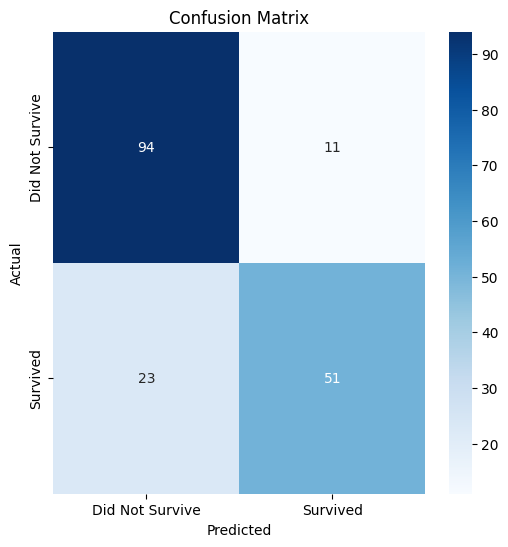

In [49]:
#Train the model using the training set
titanic_model.fit(X_train,y_train)

#Make Predictions on validation sets
tit_pred = titanic_model.predict(X_val)

#Display predictions
print("Predict_values:",tit_pred[:10])

#Display actual values
print("Actual values: ", y_val[:10].values)

# Evaluating performance metrics
accuracy = accuracy_score(y_val, tit_pred)
precision = precision_score(y_val, tit_pred)
recall = recall_score(y_val, tit_pred)
f1 = f1_score(y_val, tit_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Generating a classification report
print("\nClassification Report:\n", classification_report(y_val, tit_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, tit_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Making Predictions on Test Data**

In [50]:
# Assuming you already have a trained model and test predictions:
test_predictions = titanic_model.predict(test_data)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],  # Take PassengerId from test data
    'Survived': test_predictions  # The binary predictions for survival (1 or 0)
})

# Ensure the PassengerId is sorted if needed (depends on the competition rules)
submission.sort_values(by='PassengerId')

# Save the submission to a CSV file
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
